# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotnine
from plotnine import *

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [3]:
covid = pd.read_pickle("datos_covid.pkl")

In [4]:
covid.shape

(1299030, 8)

In [5]:
covid.describe(include = 'all')

/tmp/ipykernel_83338/1103914288.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,817,NaN,NaN,NaN,NaN
top,A,H,0-9,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,24510,433010,129903,1590,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-03-27 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.916302e+00,4.002325e-01,3.814539e-02,7.993349e-02
std,NaN,NaN,NaN,NaN,5.078917e+01,2.523791e+00,3.111515e-01,8.045517e-01
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# 2. Visualizaciones con ggplot

Además del contenido recogido en la docu. teórica, es aconsejable seguir este excelente (y práctico) tutorial:

https://realpython.com/ggplot-python/


## 2.1 Barplot por sexo y edad



In [8]:
covid2 = covid.groupby(['sexo', 'grupo_edad']).sum()
covid2 = pd.DataFrame(covid2.to_records())


/tmp/ipykernel_83338/646254824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [9]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
9,H,NC,1965,130,9,19


In [10]:
mascara_sexo = covid2['sexo'] != 'NC'
mascara_grupo_edad = covid2['grupo_edad'] != 'NC'
covid2 = covid2[mascara_sexo]
covid2 = covid2[mascara_grupo_edad]


/tmp/ipykernel_83338/1743903409.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [11]:
covid2

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551068,3356,177,15
1,H,10-19,763040,2375,192,15
2,H,20-29,772202,6641,527,78
3,H,30-39,808200,14199,1392,209
4,H,40-49,969947,31562,3690,749
5,H,50-59,705194,46558,7072,2746
6,H,60-69,417976,55989,10651,7444
7,H,70-79,262040,57114,8495,14781
8,H,80+,197154,65760,1409,31312
10,M,0-9,519666,2591,130,9


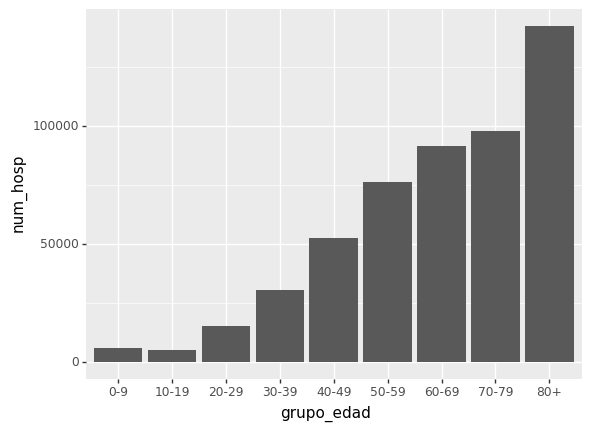

<ggplot: (8748252574006)>

In [17]:
(
ggplot(covid2)
+ aes(x = 'grupo_edad',
      y = 'num_hosp')
    + geom_bar(stat = "identity")
)

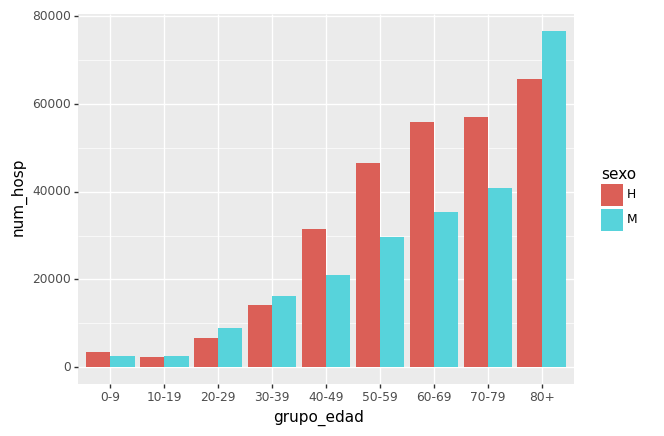

<ggplot: (8748252592690)>

In [18]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

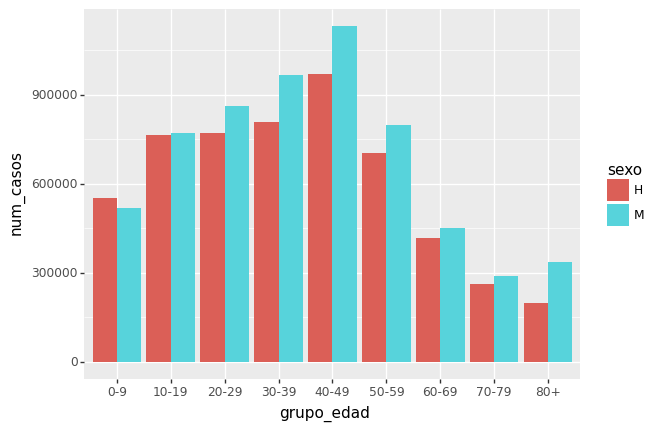

<ggplot: (8748252532004)>

In [19]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

In [20]:
grafico = (
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_casos',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
   
)

In [22]:
grafico2 = grafico + ( coord_flip())

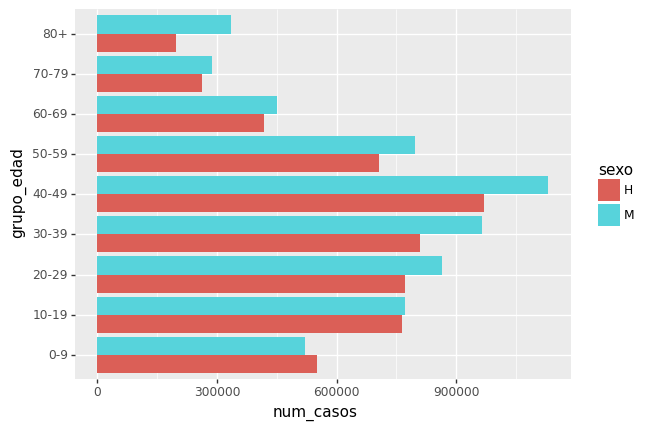

<ggplot: (8748252378698)>

In [23]:
grafico2

In [ ]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
    + coord_flip()
    + scale_fill_manual(values = ("blue", "#fbb4ae"))
)

In [ ]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + coord_flip()# Geometric object to use for drawing
   
)

In [ ]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
   
)

In [ ]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity")
    + scale_y_log10()# Geometric object to use for drawing
   
)

## 2.2 Olas (series temporales)



In [ ]:
covid3 = covid.groupby(['sexo', 'fecha']).sum()
covid3 = pd.DataFrame(covid3.to_records())
mascara_sexo = covid3['sexo'] != 'NC'
#mascara_grupo_edad = covid3['grupo_edad'] != 'NC'
covid3 = covid3[mascara_sexo]
#covid2 = covid3[mascara_grupo_edad]


In [ ]:
covid3.head()

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos")  # What variable to use
    + geom_line() 
    + theme(axis_text_x = element_text(angle = 45, 
                                       hjust = 1,
                                       size = 10))# Geometric object to use for drawing
)

In [ ]:
g = (
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_uci",
         color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)

In [ ]:
g

In [ ]:
g = g + theme(figure_size=(12, 12))

In [ ]:
g

In [ ]:
g.save('olas01.png', dpi=600)

In [ ]:
g + theme(axis_text_x = element_text(angle = -45, 
                                     vjust = 1))

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_uci",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "lowess", 
                  span = 0.15)  # Geometric object to use for drawing
)

In [ ]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_def",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)